In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

In [3]:
base_dir = r'D:\Machine Learning\UAS\TASK 3\FishImgDataset-20250612T122803Z-1-001\FishImgDataset'
img_height = 180
img_width = 180
batch_size = 32
epochs = 10


In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, "train"),
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = train_ds.class_names

Found 8819 files belonging to 31 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, "val"),
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2751 files belonging to 31 classes.


In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_dir, "test"),
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 1761 files belonging to 31 classes.


In [7]:
class_names = train_ds.class_names
print(f"Ditemukan {len(class_names)} kelas: {class_names}")

Ditemukan 31 kelas: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


In [8]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [9]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [10]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 100s 330ms/step - accuracy: 0.1778 - loss: 3.1143 - val_accuracy: 0.4148 - val_loss: 2.1328
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 113s 411ms/step - accuracy: 0.4479 - loss: 1.9848 - val_accuracy: 0.6543 - val_loss: 1.2900
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 53s 192ms/step - accuracy: 0.6671 - loss: 1.1736 - val_accuracy: 0.7993 - val_loss: 0.7381
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 48s 175ms/step - accuracy: 0.8339 - loss: 0.5818 - val_accuracy: 0.8775 - val_loss: 0.4846
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 49s 178ms/step - accuracy: 0.9303 - loss: 0.2539 - val_accuracy: 0.9258 - val_loss: 0.3867
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 49s 176ms/step - accuracy: 0.9632 - loss: 0.1357 - val_accuracy: 0.9451 - val_loss: 0.3523
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 54s 197ms/step - accuracy: 0.9862 - loss: 0.0656 - val_accuracy: 0.9360 - val_loss: 0.4004
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 48s 173ms/step - accuracy: 0.9850 - loss:

In [12]:
test_loss, test_acc = model.evaluate(test_ds)

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9084 - loss: 0.7497


In [13]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━

In [14]:
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))


=== Classification Report ===
                       precision    recall  f1-score   support

               Bangus       0.82      0.91      0.86        34
        Big Head Carp       0.86      0.84      0.85        43
   Black Spotted Barb       0.97      0.82      0.89        40
              Catfish       0.85      0.89      0.87        62
       Climbing Perch       0.84      0.87      0.85        30
 Fourfinger Threadfin       0.81      0.92      0.86        38
       Freshwater Eel       0.88      0.91      0.89        55
       Glass Perchlet       0.93      0.91      0.92        77
                 Goby       0.92      0.94      0.93       124
            Gold Fish       1.00      0.90      0.95        41
              Gourami       0.94      0.94      0.94        63
           Grass Carp       0.90      0.98      0.94       238
 Green Spotted Puffer       0.90      0.82      0.86        22
          Indian Carp       0.94      0.89      0.91        53
  Indo-Pacific Tarpon  

C:\Users\bimod\AppData\Local\Temp\ipykernel_8028\1409777604.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


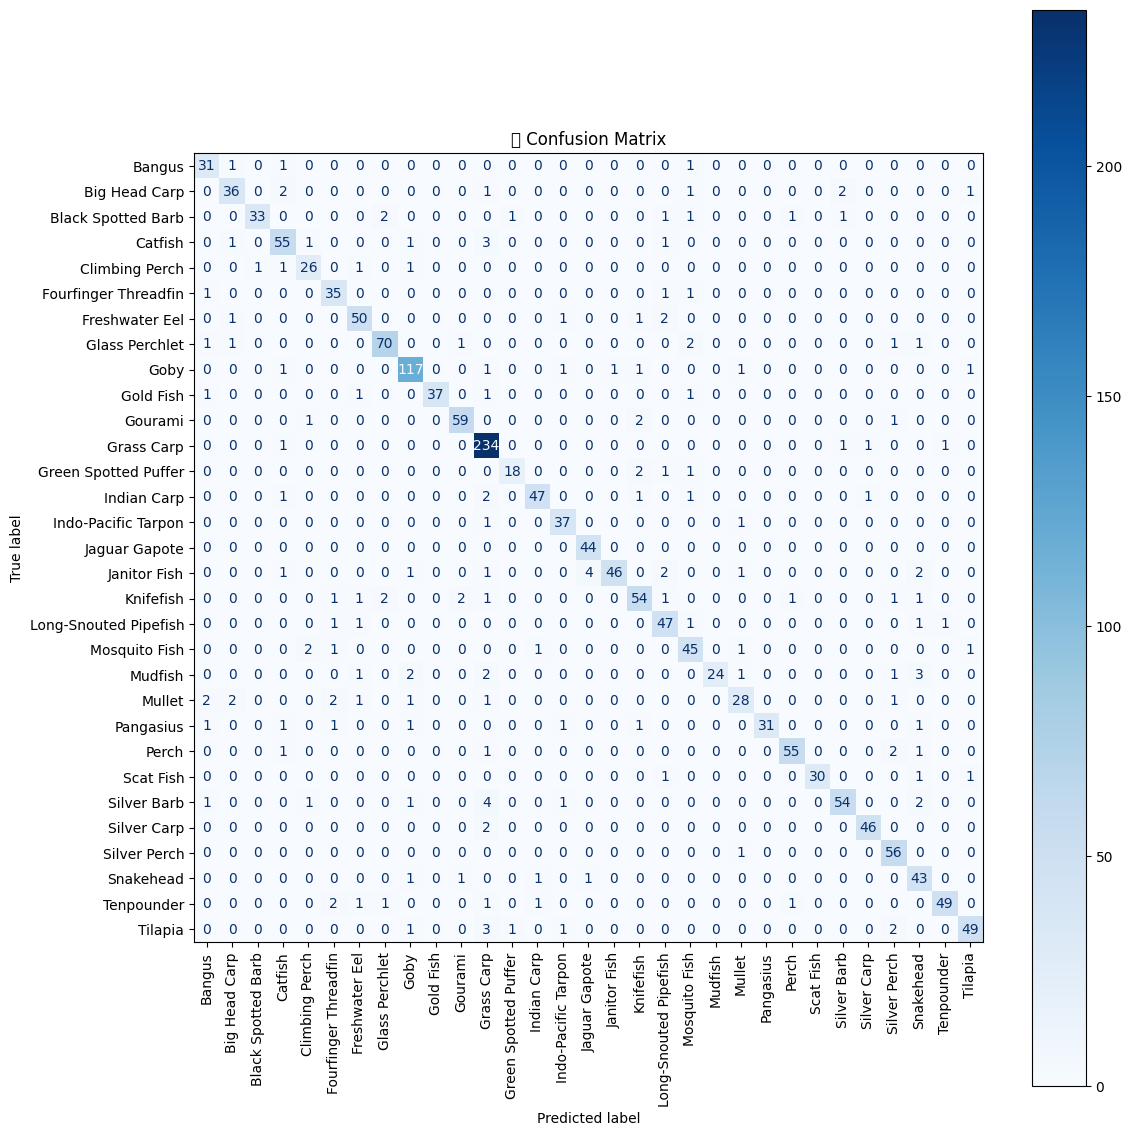

In [15]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.tight_layout()
plt.show()

C:\Users\bimod\AppData\Local\Temp\ipykernel_8028\1904876049.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bimod\AppData\Local\Temp\ipykernel_8028\1904876049.py:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bimod\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


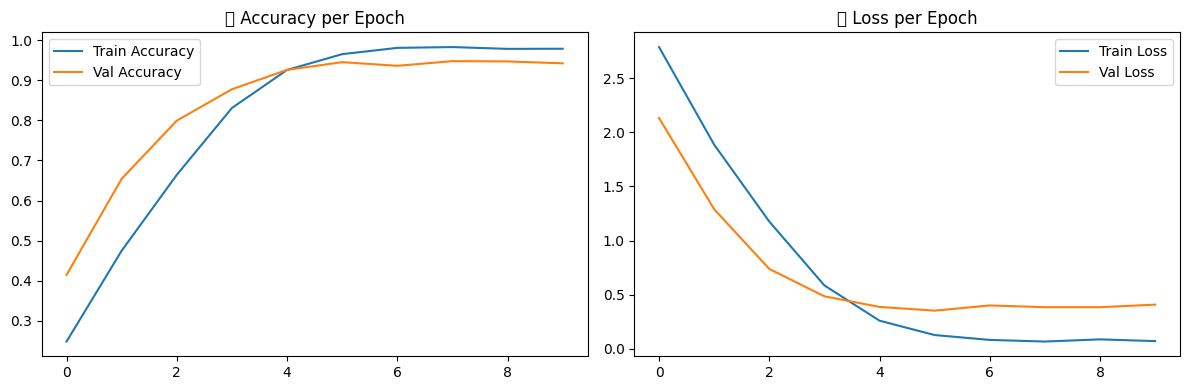

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Train Accuracy")
plt.plot(epochs_range, val_acc, label="Val Accuracy")
plt.title("📈 Accuracy per Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.title("📉 Loss per Epoch")
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
# Mendefinisikan model CNN
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,650,975 (25.37 MB)

 Trainable params: 6,650,975 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 60s 210ms/step - accuracy: 0.1954 - loss: 3.0389 - val_accuracy: 0.4311 - val_loss: 2.0122
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 51s 184ms/step - accuracy: 0.4577 - loss: 1.9322 - val_accuracy: 0.6648 - val_loss: 1.1715
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 182ms/step - accuracy: 0.6786 - loss: 1.1370 - val_accuracy: 0.7601 - val_loss: 0.8674
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 181ms/step - accuracy: 0.8266 - loss: 0.5929 - val_accuracy: 0.8884 - val_loss: 0.4716
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 53s 191ms/step - accuracy: 0.9209 - loss: 0.2623 - val_accuracy: 0.9062 - val_loss: 0.4538
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 55s 198ms/step - accuracy: 0.9549 - loss: 0.1541 - val_accuracy: 0.9153 - val_loss: 0.4360
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 182ms/step - accuracy: 0.9630 - loss: 0.1155 - val_accuracy: 0.9273 - val_loss: 0.4160
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 50s 181ms/step - accuracy: 0.9707 - loss: 0

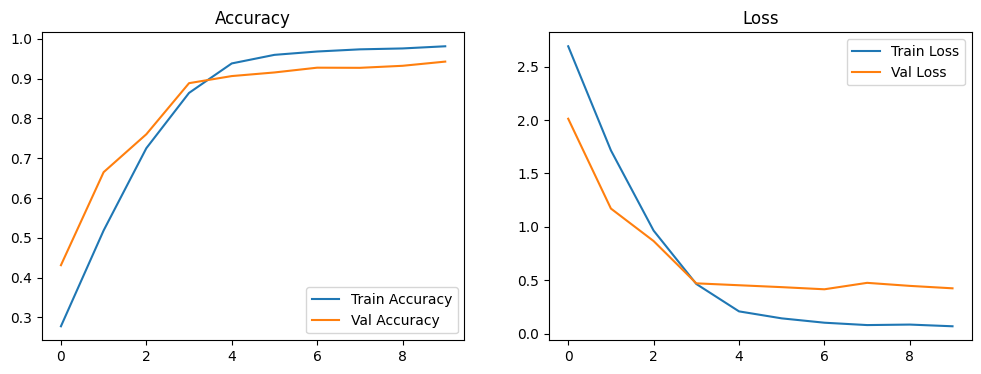

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [22]:
# --- PENJELASAN METRIK ---
print("""
\n=== Penjelasan Evaluasi Klasifikasi ===
1. Accuracy: Persentase prediksi yang benar. Cocok jika jumlah kelas seimbang.
2. Precision: Berapa banyak prediksi positif yang benar. Cocok jika False Positive berbahaya.
3. Recall: Berapa banyak data positif yang berhasil dikenali. Cocok jika False Negative harus dihindari.
4. F1-Score: Rata-rata harmonik dari Precision dan Recall. Cocok saat ingin seimbang.
5. AUC-ROC: Mengukur kemampuan model membedakan antar kelas (semakin mendekati 1 semakin baik).

Karena dataset ikan ini cukup seimbang dan memiliki banyak kelas, maka:
Accuracy dan F1-Score menjadi metrik evaluasi terbaik untuk kasus ini.
""")



=== Penjelasan Evaluasi Klasifikasi ===
1. Accuracy: Persentase prediksi yang benar. Cocok jika jumlah kelas seimbang.
2. Precision: Berapa banyak prediksi positif yang benar. Cocok jika False Positive berbahaya.
3. Recall: Berapa banyak data positif yang berhasil dikenali. Cocok jika False Negative harus dihindari.
4. F1-Score: Rata-rata harmonik dari Precision dan Recall. Cocok saat ingin seimbang.
5. AUC-ROC: Mengukur kemampuan model membedakan antar kelas (semakin mendekati 1 semakin baik).

Karena dataset ikan ini cukup seimbang dan memiliki banyak kelas, maka:
Accuracy dan F1-Score menjadi metrik evaluasi terbaik untuk kasus ini.

